## Lab 6 - Spatial Data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import censusdata

### Overview of data sources:
- ACS: American Community Survey: total population by block
- Census: provides census block boundaries (multi-polygon)
- Crime: crime with location (lat/long)

In [25]:
def crimes_gdf():
    crimes = pd.read_csv('https://data.cityofchicago.org/api/views/w98m-zvie/rows.csv?accessType=DOWNLOAD')
    crimes.dropna(inplace=True)
    crimes_gdf = gpd.GeoDataFrame(crimes, geometry=gpd.points_from_xy(crimes.Longitude, crimes.Latitude))
    return crimes_gdf

In [26]:
crimes_gdf = crimes_gdf()
crimes_gdf.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,geometry
3,11947976,JD111196,12/01/2019 12:10:00 AM,105XX S YATES AVE,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,...,51,02,1194207.0,1835645.0,2019,11/03/2020 03:48:30 PM,41.703941,-87.564457,"(41.703941047, -87.564457187)",POINT (-87.56446 41.70394)
4,11931877,JC559513,12/25/2019 01:37:00 AM,035XX S WASHTENAW AVE,041A,BATTERY,AGGRAVATED - HANDGUN,RESIDENCE,True,False,...,58,04B,1158944.0,1880915.0,2019,11/03/2020 03:48:30 PM,41.828960,-87.692349,"(41.828960051, -87.692348667)",POINT (-87.69235 41.82896)
5,11897326,JC517682,11/10/2019 12:01:00 AM,072XX S OGLESBY AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,...,43,17,1193133.0,1857369.0,2019,11/03/2020 03:48:30 PM,41.763580,-87.567682,"(41.763579918, -87.56768225)",POINT (-87.56768 41.76358)
6,11865011,JC477695,10/15/2019 08:31:00 PM,001XX W DIVISION ST,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,...,8,10,1175144.0,1908348.0,2019,11/03/2020 03:48:30 PM,41.903891,-87.632090,"(41.903890971, -87.632089801)",POINT (-87.63209 41.90389)
7,11861652,JC473534,10/15/2019 11:40:00 AM,004XX W HARRISON ST,1120,DECEPTIVE PRACTICE,FORGERY,GOVERNMENT BUILDING / PROPERTY,True,False,...,28,10,1173461.0,1897593.0,2019,11/03/2020 03:48:30 PM,41.874416,-87.638592,"(41.8744162, -87.638591667)",POINT (-87.63859 41.87442)


In [47]:
census_gdf = gpd.read_file("https://data.cityofchicago.org/resource/bt9m-d2mf.geojson?$limit=9999999")
census_gdf.head()

,statefp10,name10,blockce10,tract_bloc,geoid10,tractce10,countyfp10,geometry
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ..."
1,17,Block 3007,3007,6809003007,170316809003007,680900,031,"MULTIPOLYGON (((-87.63412 41.77447, -87.63410 ..."
2,17,Block 3013,3013,6809003013,170316809003013,680900,031,"MULTIPOLYGON (((-87.63485 41.77263, -87.63522 ..."
3,17,Block 4019,4019,2909004019,170312909004019,290900,031,"MULTIPOLYGON (((-87.73841 41.85913, -87.73842 ..."
4,17,Block 4016,4016,2925004016,170312925004016,292500,031,"MULTIPOLYGON (((-87.73217 41.85476, -87.73226 ..."


In [61]:
crimes_gdf.crs = "EPSG:4326"
census_gdf.crs = "EPSG:4326"

In [66]:
# merged the acs-census data with crime data
merged_gdf = gpd.sjoin(crimes_gdf, census_gdf, how="inner", op='intersects')
merged_gdf.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,geometry,index_right,statefp10,name10,blockce10,tract_bloc,geoid10,tractce10,countyfp10
3,11947976,JD111196,12/01/2019 12:10:00 AM,105XX S YATES AVE,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,...,"(41.703941047, -87.564457187)",POINT (-87.56446 41.70394),12297,17,Block 2051,2051,8388002051,170318388002051,838800,031
6902,11940868,JD103027,11/18/2019 04:00:00 PM,105XX S OGLESBY AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,"(41.703823312, -87.565729315)",POINT (-87.56573 41.70382),12297,17,Block 2051,2051,8388002051,170318388002051,838800,031
7703,11936564,JC565310,12/30/2019 12:30:00 PM,105XX S OGLESBY AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,"(41.703858986, -87.565728891)",POINT (-87.56573 41.70386),12297,17,Block 2051,2051,8388002051,170318388002051,838800,031
11447,11931487,JC559014,12/24/2019 03:21:00 PM,105XX S OGLESBY AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,"(41.703858986, -87.565728891)",POINT (-87.56573 41.70386),12297,17,Block 2051,2051,8388002051,170318388002051,838800,031
21872,11915626,JC539394,12/08/2019 02:32:00 PM,105XX S OGLESBY AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,PARKING LOT/GARAGE(NON.RESID.),True,False,...,"(41.703924869, -87.565731769)",POINT (-87.56573 41.70392),12297,17,Block 2051,2051,8388002051,170318388002051,838800,031


In [37]:
# keeping only necessary columns
limited_gdf = merged_gdf[["ID", "Case Number", "Year", "Primary Type", "blockce10", "geoid10", "geometry"]]

# clean data
limited_gdf = limited_gdf.dropna()
limited_gdf = limited_gdf.drop_duplicates('Case Number')
limited_gdf.head()

,ID,Case Number,Year,Primary Type,blockce10,geoid10,geometry
3,11947976,JD111196,2019,CRIMINAL SEXUAL ASSAULT,2051,170318388002051,POINT (-87.56446 41.70394)
4,11931877,JC559513,2019,BATTERY,1012,170315801001012,POINT (-87.69235 41.82896)
5,11897326,JC517682,2019,OFFENSE INVOLVING CHILDREN,2001,170314306002001,POINT (-87.56768 41.76358)
6,11865011,JC477695,2019,DECEPTIVE PRACTICE,1001,170310802021001,POINT (-87.63209 41.90389)
7,11861652,JC473534,2019,DECEPTIVE PRACTICE,1040,170318419001040,POINT (-87.63859 41.87442)


In [42]:
# count by geoid
count_by_block = pd.Series(limited_gdf.groupby(['geoid10', 'Year'])['Case Number'].count(), name='crime_count').reset_index()
crime_count_gdf = gpd.GeoDataFrame(count_by_block)
crime_count_gdf.head()

,geoid10,Year,crime_count
0,170310101001000,2019,5
1,170310101001001,2019,11
2,170310101001002,2019,1
3,170310101001003,2019,56
4,170310101002000,2019,8


In [70]:
crime_graph = crime_count_gdf.merge(census_gdf[['geoid10', 'geometry']], on='geoid10')
crime_graph = gpd.GeoDataFrame(crime_graph)
crime_graph['log_crime_count'] = np.log(crime_graph['crime_count'])
crime_graph = crime_graph.drop_duplicates('geometry')
crime_graph.head()

,geoid10,Year,crime_count,geometry,log_crime_count
0,170310101001000,2019,5,"MULTIPOLYGON (((-87.66635 42.02252, -87.66666 ...",1.609438
1,170310101001001,2019,11,"MULTIPOLYGON (((-87.66754 42.02224, -87.66763 ...",2.397895
2,170310101001002,2019,1,"MULTIPOLYGON (((-87.67009 42.02226, -87.66994 ...",0.000000
3,170310101001003,2019,56,"MULTIPOLYGON (((-87.67009 42.02115, -87.67047 ...",4.025352
4,170310101002000,2019,8,"MULTIPOLYGON (((-87.67188 42.02299, -87.67007 ...",2.079442


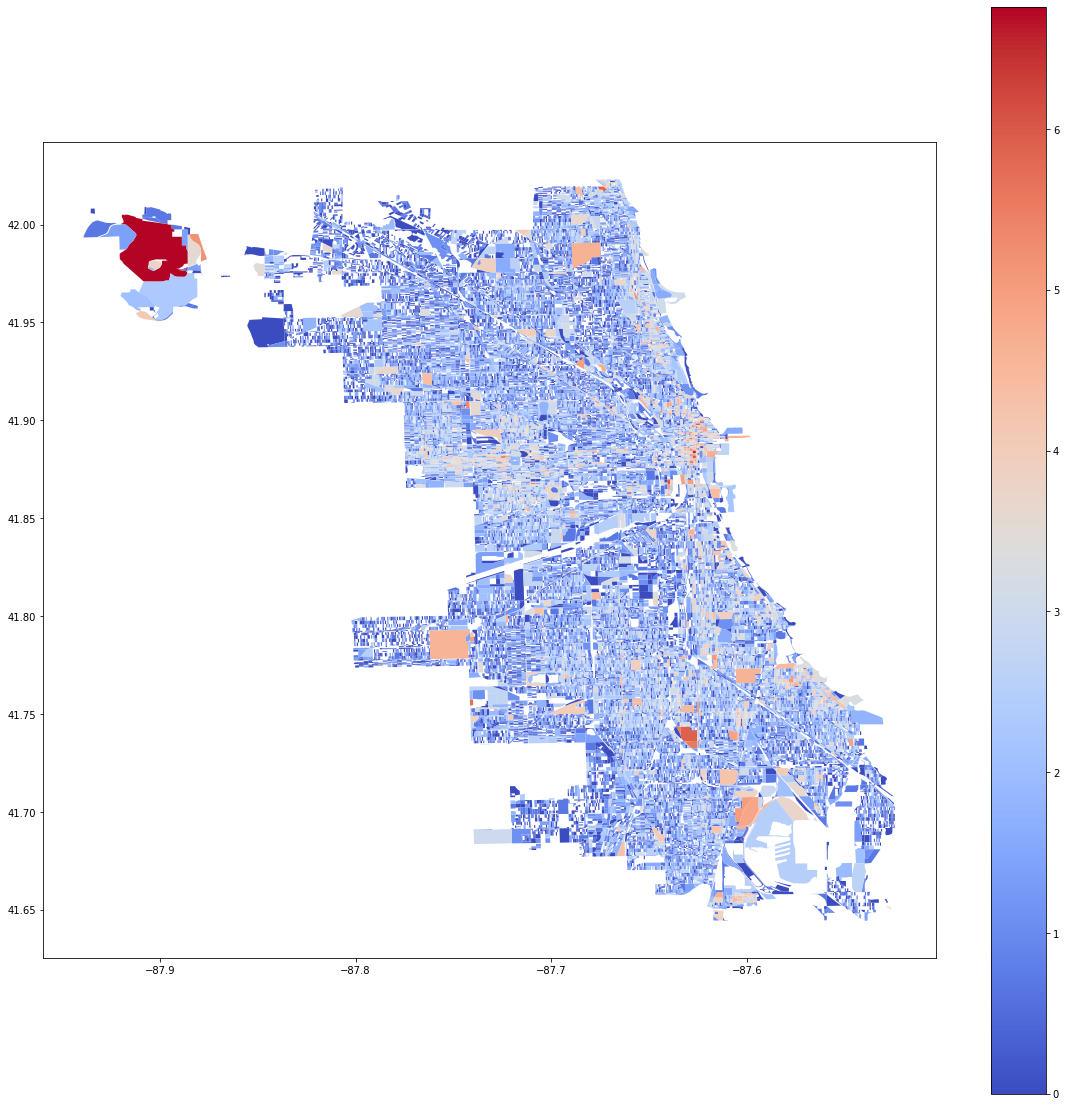

In [75]:
crime_graph.plot(figsize=(20, 20), column='log_crime_count', cmap=plt.cm.coolwarm, legend=True)